In [1]:
import os

train_dir='C:/Users/ahmet/Desktop/Alzheimer Tez 0/train'
test_dir='C:/Users/ahmet/Desktop/Alzheimer Tez 0/test'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
                          
                            
                             
                                                    
train_gen = datagen.flow_from_directory(train_dir,
                                        target_size=(150, 150),
                                        batch_size=64,
                                        class_mode='categorical',
                                        color_mode='grayscale',
                                        shuffle=True,
                                        subset="training"
                                        )


valid_gen = datagen.flow_from_directory(train_dir,
                                        target_size=(150, 150),
                                        batch_size=64,
                                        class_mode='categorical',
                                        color_mode='grayscale',
                                        shuffle=True,
                                        subset="validation"
                                        )


test_gen = datagen.flow_from_directory(test_dir,
                                       target_size=(150, 150),
                                       batch_size=64,
                                       class_mode='categorical',
                                       color_mode='grayscale'
                                       )


Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy


In [4]:
cnn = Sequential()

cnn.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(150,150, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(Conv2D(filters=16, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(Conv2D(filters=64, kernel_size=(3,3),padding='same', activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(Flatten())

cnn.add(tf.keras.layers.Dropout(0.5))

cnn.add(Dense(512, activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.2))

cnn.add(Dense(128, activation='relu'))

cnn.add(Dense(128, activation='relu'))

cnn.add(Dense(128, activation='relu'))

cnn.add(Dense(4, activation='softmax'))

In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        9

In [6]:
cnn.compile(loss=categorical_crossentropy,
                    optimizer=Adam(lr=0.001),
                    metrics=['accuracy'])

In [7]:
history = cnn.fit(train_gen,
                          batch_size=64,
                          epochs=1001,
                          verbose=1,
                          validation_data=valid_gen
                          )

Epoch 1/1001
65/65 [==============================] - 39s 595ms/step - loss: 1.0617 - accuracy: 0.4719 - val_loss: 1.0540 - val_accuracy: 0.5005
Epoch 2/1001
65/65 [==============================] - 41s 626ms/step - loss: 1.0366 - accuracy: 0.4988 - val_loss: 1.0562 - val_accuracy: 0.5005
Epoch 3/1001
65/65 [==============================] - 42s 640ms/step - loss: 1.0199 - accuracy: 0.4990 - val_loss: 1.0586 - val_accuracy: 0.5474
Epoch 4/1001
65/65 [==============================] - 40s 618ms/step - loss: 0.9576 - accuracy: 0.5364 - val_loss: 0.9895 - val_accuracy: 0.5191
Epoch 5/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.9142 - accuracy: 0.5490 - val_loss: 0.9991 - val_accuracy: 0.4448
Epoch 6/1001
65/65 [==============================] - 39s 593ms/step - loss: 0.8872 - accuracy: 0.5903 - val_loss: 1.0173 - val_accuracy: 0.3763
Epoch 7/1001
65/65 [==============================] - 39s 598ms/step - loss: 0.8906 - accuracy: 0.5793 - val_loss: 1.0456 - val_ac

65/65 [==============================] - 45s 698ms/step - loss: 0.0505 - accuracy: 0.9800 - val_loss: 0.3165 - val_accuracy: 0.8837
Epoch 114/1001
65/65 [==============================] - 46s 702ms/step - loss: 0.0543 - accuracy: 0.9797 - val_loss: 0.3063 - val_accuracy: 0.8788
Epoch 115/1001
65/65 [==============================] - 45s 699ms/step - loss: 0.0538 - accuracy: 0.9802 - val_loss: 0.3039 - val_accuracy: 0.8827
Epoch 116/1001
65/65 [==============================] - 46s 705ms/step - loss: 0.0502 - accuracy: 0.9841 - val_loss: 0.3462 - val_accuracy: 0.8641
Epoch 117/1001
65/65 [==============================] - 45s 693ms/step - loss: 0.0410 - accuracy: 0.9871 - val_loss: 0.3438 - val_accuracy: 0.8768
Epoch 118/1001
65/65 [==============================] - 45s 694ms/step - loss: 0.0538 - accuracy: 0.9817 - val_loss: 0.4689 - val_accuracy: 0.8465
Epoch 119/1001
65/65 [==============================] - 46s 705ms/step - loss: 0.0606 - accuracy: 0.9785 - val_loss: 0.4082 - val_acc

Epoch 169/1001
65/65 [==============================] - 47s 726ms/step - loss: 0.0406 - accuracy: 0.9849 - val_loss: 0.3947 - val_accuracy: 0.8612
Epoch 170/1001
65/65 [==============================] - 48s 731ms/step - loss: 0.0333 - accuracy: 0.9907 - val_loss: 0.3083 - val_accuracy: 0.8974
Epoch 171/1001
65/65 [==============================] - 48s 737ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.2224 - val_accuracy: 0.9208
Epoch 172/1001
65/65 [==============================] - 48s 736ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.2725 - val_accuracy: 0.9052
Epoch 173/1001
65/65 [==============================] - 47s 724ms/step - loss: 0.0217 - accuracy: 0.9934 - val_loss: 0.3636 - val_accuracy: 0.8935
Epoch 174/1001
65/65 [==============================] - 46s 713ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.3046 - val_accuracy: 0.8905
Epoch 175/1001
65/65 [==============================] - 47s 727ms/step - loss: 0.0386 - accuracy: 0.9885 - val_loss: 0

Epoch 225/1001
65/65 [==============================] - 38s 588ms/step - loss: 0.0285 - accuracy: 0.9893 - val_loss: 0.2067 - val_accuracy: 0.9326
Epoch 226/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0357 - accuracy: 0.9873 - val_loss: 0.2911 - val_accuracy: 0.8954
Epoch 227/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0237 - accuracy: 0.9917 - val_loss: 0.2326 - val_accuracy: 0.9277
Epoch 228/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0242 - accuracy: 0.9919 - val_loss: 0.2636 - val_accuracy: 0.9110
Epoch 229/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0253 - accuracy: 0.9924 - val_loss: 0.2483 - val_accuracy: 0.9140
Epoch 230/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0350 - accuracy: 0.9868 - val_loss: 0.2802 - val_accuracy: 0.9032
Epoch 231/1001
65/65 [==============================] - 38s 592ms/step - loss: 0.0356 - accuracy: 0.9885 - val_loss: 0

Epoch 281/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.2208 - val_accuracy: 0.9247
Epoch 282/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0308 - accuracy: 0.9919 - val_loss: 0.1807 - val_accuracy: 0.9365
Epoch 283/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0281 - accuracy: 0.9917 - val_loss: 0.1876 - val_accuracy: 0.9228
Epoch 284/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0337 - accuracy: 0.9919 - val_loss: 0.2322 - val_accuracy: 0.9150
Epoch 285/1001
65/65 [==============================] - 38s 592ms/step - loss: 0.0230 - accuracy: 0.9912 - val_loss: 0.2103 - val_accuracy: 0.9218
Epoch 286/1001
65/65 [==============================] - 38s 588ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.2125 - val_accuracy: 0.9218
Epoch 287/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0701 - accuracy: 0.9788 - val_loss: 0

Epoch 337/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0204 - accuracy: 0.9924 - val_loss: 0.1891 - val_accuracy: 0.9345
Epoch 338/1001
65/65 [==============================] - 39s 594ms/step - loss: 0.0237 - accuracy: 0.9932 - val_loss: 0.2138 - val_accuracy: 0.9326
Epoch 339/1001
65/65 [==============================] - 39s 597ms/step - loss: 0.0234 - accuracy: 0.9932 - val_loss: 0.2026 - val_accuracy: 0.9286
Epoch 340/1001
65/65 [==============================] - 39s 593ms/step - loss: 0.0218 - accuracy: 0.9939 - val_loss: 0.1693 - val_accuracy: 0.9404
Epoch 341/1001
65/65 [==============================] - 39s 597ms/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.1748 - val_accuracy: 0.9384
Epoch 342/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0241 - accuracy: 0.9924 - val_loss: 0.2057 - val_accuracy: 0.9238
Epoch 343/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0209 - accuracy: 0.9939 - val_loss: 0

Epoch 393/1001
65/65 [==============================] - 39s 593ms/step - loss: 0.0214 - accuracy: 0.9937 - val_loss: 0.1880 - val_accuracy: 0.9296
Epoch 394/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0171 - accuracy: 0.9934 - val_loss: 0.1384 - val_accuracy: 0.9462
Epoch 395/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0155 - accuracy: 0.9954 - val_loss: 0.1529 - val_accuracy: 0.9404
Epoch 396/1001
65/65 [==============================] - 39s 596ms/step - loss: 0.0135 - accuracy: 0.9956 - val_loss: 0.2046 - val_accuracy: 0.9218
Epoch 397/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0230 - accuracy: 0.9927 - val_loss: 0.1538 - val_accuracy: 0.9482
Epoch 398/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0156 - accuracy: 0.9946 - val_loss: 0.1727 - val_accuracy: 0.9492
Epoch 399/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0107 - accuracy: 0.9961 - val_loss: 0

Epoch 449/1001
65/65 [==============================] - 43s 669ms/step - loss: 0.0155 - accuracy: 0.9944 - val_loss: 0.3296 - val_accuracy: 0.9042
Epoch 450/1001
65/65 [==============================] - 47s 717ms/step - loss: 0.0218 - accuracy: 0.9944 - val_loss: 0.1719 - val_accuracy: 0.9335
Epoch 451/1001
65/65 [==============================] - 43s 666ms/step - loss: 0.0177 - accuracy: 0.9937 - val_loss: 0.1679 - val_accuracy: 0.9326
Epoch 452/1001
65/65 [==============================] - 44s 671ms/step - loss: 0.0125 - accuracy: 0.9971 - val_loss: 0.2219 - val_accuracy: 0.9198
Epoch 453/1001
65/65 [==============================] - 45s 686ms/step - loss: 0.0202 - accuracy: 0.9934 - val_loss: 0.2054 - val_accuracy: 0.9228
Epoch 454/1001
65/65 [==============================] - 43s 666ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.1950 - val_accuracy: 0.9316
Epoch 455/1001
65/65 [==============================] - 45s 693ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0

Epoch 505/1001
65/65 [==============================] - 39s 592ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.1212 - val_accuracy: 0.9521
Epoch 506/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0167 - accuracy: 0.9939 - val_loss: 0.2227 - val_accuracy: 0.9140
Epoch 507/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0111 - accuracy: 0.9959 - val_loss: 0.1715 - val_accuracy: 0.9404
Epoch 508/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0135 - accuracy: 0.9949 - val_loss: 0.2415 - val_accuracy: 0.9198
Epoch 509/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0107 - accuracy: 0.9959 - val_loss: 0.1133 - val_accuracy: 0.9609
Epoch 510/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0078 - accuracy: 0.9971 - val_loss: 0.1638 - val_accuracy: 0.9472
Epoch 511/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0157 - accuracy: 0.9954 - val_loss: 0

Epoch 561/1001
65/65 [==============================] - 46s 707ms/step - loss: 0.0225 - accuracy: 0.9941 - val_loss: 0.1687 - val_accuracy: 0.9384
Epoch 562/1001
65/65 [==============================] - 45s 689ms/step - loss: 0.0263 - accuracy: 0.9912 - val_loss: 0.1194 - val_accuracy: 0.9521
Epoch 563/1001
65/65 [==============================] - 45s 694ms/step - loss: 0.0126 - accuracy: 0.9963 - val_loss: 0.1840 - val_accuracy: 0.9394
Epoch 564/1001
65/65 [==============================] - 45s 695ms/step - loss: 0.0116 - accuracy: 0.9961 - val_loss: 0.2565 - val_accuracy: 0.9198
Epoch 565/1001
65/65 [==============================] - 45s 691ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.1544 - val_accuracy: 0.9443
Epoch 566/1001
65/65 [==============================] - 46s 707ms/step - loss: 0.0239 - accuracy: 0.9939 - val_loss: 0.1438 - val_accuracy: 0.9482
Epoch 567/1001
65/65 [==============================] - 45s 695ms/step - loss: 0.0133 - accuracy: 0.9954 - val_loss: 0

Epoch 617/1001
65/65 [==============================] - 36s 555ms/step - loss: 0.0156 - accuracy: 0.9959 - val_loss: 0.1465 - val_accuracy: 0.9511
Epoch 618/1001
65/65 [==============================] - 38s 580ms/step - loss: 0.0187 - accuracy: 0.9929 - val_loss: 0.1230 - val_accuracy: 0.9599
Epoch 619/1001
65/65 [==============================] - 38s 588ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.1307 - val_accuracy: 0.9511
Epoch 620/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.0828 - val_accuracy: 0.9697
Epoch 621/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0147 - accuracy: 0.9951 - val_loss: 0.1012 - val_accuracy: 0.9599
Epoch 622/1001
65/65 [==============================] - 38s 587ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.1076 - val_accuracy: 0.9599
Epoch 623/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0070 - accuracy: 0.9983 - val_loss: 0

Epoch 673/1001
65/65 [==============================] - 38s 592ms/step - loss: 0.0161 - accuracy: 0.9951 - val_loss: 0.2900 - val_accuracy: 0.9052
Epoch 674/1001
65/65 [==============================] - 38s 588ms/step - loss: 0.0152 - accuracy: 0.9949 - val_loss: 0.1695 - val_accuracy: 0.9374
Epoch 675/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0124 - accuracy: 0.9954 - val_loss: 0.2352 - val_accuracy: 0.9218
Epoch 676/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.1203 - val_accuracy: 0.9580
Epoch 677/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.1446 - val_accuracy: 0.9472
Epoch 678/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.1352 - val_accuracy: 0.9550
Epoch 679/1001
65/65 [==============================] - 38s 588ms/step - loss: 0.0055 - accuracy: 0.9976 - val_loss: 0

Epoch 729/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0207 - accuracy: 0.9932 - val_loss: 0.1278 - val_accuracy: 0.9531
Epoch 730/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.1126 - val_accuracy: 0.9570
Epoch 731/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0119 - accuracy: 0.9959 - val_loss: 0.1514 - val_accuracy: 0.9472
Epoch 732/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0147 - accuracy: 0.9954 - val_loss: 0.1053 - val_accuracy: 0.9599
Epoch 733/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.1045 - val_accuracy: 0.9609
Epoch 734/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0089 - accuracy: 0.9966 - val_loss: 0.1499 - val_accuracy: 0.9501
Epoch 735/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0122 - accuracy: 0.9968 - val_loss: 0

Epoch 785/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0089 - accuracy: 0.9980 - val_loss: 0.0953 - val_accuracy: 0.9589
Epoch 786/1001
65/65 [==============================] - 39s 600ms/step - loss: 0.0101 - accuracy: 0.9959 - val_loss: 0.1178 - val_accuracy: 0.9550
Epoch 787/1001
65/65 [==============================] - 39s 592ms/step - loss: 0.0035 - accuracy: 0.9988 - val_loss: 0.1313 - val_accuracy: 0.9511
Epoch 788/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.2018 - val_accuracy: 0.9267
Epoch 789/1001
65/65 [==============================] - 39s 593ms/step - loss: 0.0215 - accuracy: 0.9946 - val_loss: 0.1359 - val_accuracy: 0.9511
Epoch 790/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0167 - accuracy: 0.9954 - val_loss: 0.1537 - val_accuracy: 0.9335
Epoch 791/1001
65/65 [==============================] - 39s 593ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0

Epoch 841/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0116 - accuracy: 0.9968 - val_loss: 0.1266 - val_accuracy: 0.9521
Epoch 842/1001
65/65 [==============================] - 38s 588ms/step - loss: 0.0134 - accuracy: 0.9949 - val_loss: 0.1300 - val_accuracy: 0.9560
Epoch 843/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0089 - accuracy: 0.9980 - val_loss: 0.1352 - val_accuracy: 0.9531
Epoch 844/1001
65/65 [==============================] - 38s 587ms/step - loss: 0.0097 - accuracy: 0.9971 - val_loss: 0.1369 - val_accuracy: 0.9550
Epoch 845/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0109 - accuracy: 0.9968 - val_loss: 0.1292 - val_accuracy: 0.9541
Epoch 846/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0098 - accuracy: 0.9973 - val_loss: 0.0896 - val_accuracy: 0.9638
Epoch 847/1001
65/65 [==============================] - 38s 584ms/step - loss: 0.0171 - accuracy: 0.9944 - val_loss: 0

Epoch 897/1001
65/65 [==============================] - 38s 591ms/step - loss: 0.0133 - accuracy: 0.9961 - val_loss: 0.1150 - val_accuracy: 0.9541
Epoch 898/1001
65/65 [==============================] - 38s 587ms/step - loss: 0.0067 - accuracy: 0.9976 - val_loss: 0.0933 - val_accuracy: 0.9707
Epoch 899/1001
65/65 [==============================] - 38s 588ms/step - loss: 0.0044 - accuracy: 0.9983 - val_loss: 0.1184 - val_accuracy: 0.9619
Epoch 900/1001
65/65 [==============================] - 38s 588ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.1096 - val_accuracy: 0.9668
Epoch 901/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0058 - accuracy: 0.9976 - val_loss: 0.1231 - val_accuracy: 0.9560
Epoch 902/1001
65/65 [==============================] - 38s 592ms/step - loss: 0.0082 - accuracy: 0.9968 - val_loss: 0.1361 - val_accuracy: 0.9541
Epoch 903/1001
65/65 [==============================] - 38s 588ms/step - loss: 0.0133 - accuracy: 0.9949 - val_loss: 0

Epoch 953/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0049 - accuracy: 0.9980 - val_loss: 0.1936 - val_accuracy: 0.9521
Epoch 954/1001
65/65 [==============================] - 38s 586ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.1847 - val_accuracy: 0.9521
Epoch 955/1001
65/65 [==============================] - 38s 589ms/step - loss: 0.0119 - accuracy: 0.9961 - val_loss: 0.0978 - val_accuracy: 0.9658
Epoch 956/1001
65/65 [==============================] - 39s 593ms/step - loss: 0.0161 - accuracy: 0.9963 - val_loss: 0.0992 - val_accuracy: 0.9677
Epoch 957/1001
65/65 [==============================] - 38s 588ms/step - loss: 0.0122 - accuracy: 0.9954 - val_loss: 0.1632 - val_accuracy: 0.9638
Epoch 958/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 0.1574 - val_accuracy: 0.9541
Epoch 959/1001
65/65 [==============================] - 38s 590ms/step - loss: 0.0141 - accuracy: 0.9976 - val_loss: 0

In [8]:
loss,accuracy =cnn.evaluate(test_gen)
#print("Test: accuracy = %f  ;  loss = %f " % (accuracy, loss))

20/20 [==============================] - 2s 120ms/step - loss: 2.1484 - accuracy: 0.8084


In [63]:
_=model.evaluate(test_gen)

20/20 [==============================] - 2s 116ms/step - loss: 0.8231 - accuracy: 0.8382


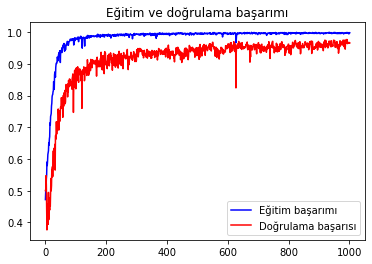

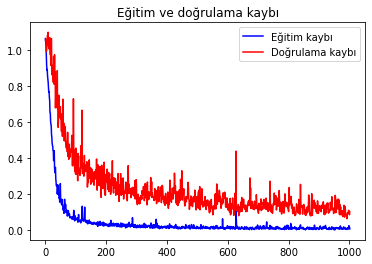

In [9]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc)+1)

plt.plot(epochs,acc,'b-',label='Eğitim başarımı')
plt.plot(epochs,val_acc,'r',label='Doğrulama başarısı')
plt.title('Eğitim ve doğrulama başarımı')
plt.legend()

plt.figure()

plt.plot(epochs,loss,'b-',label='Eğitim kaybı')
plt.plot(epochs,val_loss,'r',label='Doğrulama kaybı')
plt.title('Eğitim ve doğrulama kaybı')
plt.legend()

plt.show()

In [3]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

In [4]:
model = load_model('C:/Users/ahmet/Desktop/Alzheimer Tez 0/alz_model')

In [5]:
class_names = ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']

In [6]:
test_MildDemented='C:/Users/ahmet/Desktop/Alzheimer Tez 0/test/MildDemented/27 (6).jpg'
test_ModerateDemented='C:/Users/ahmet/Desktop/Alzheimer Tez 0/test/ModerateDemented/27 (2).jpg'
test_NonDemented='C:/Users/ahmet/Desktop/Alzheimer Tez 0/test/NonDemented/26 (77).jpg'
test_VeryMildDemented='C:/Users/ahmet/Desktop/Alzheimer Tez 0/test/VeryMildDemented/27 (3).jpg'

In [7]:
image = load_img(test_MildDemented, target_size=(150, 150), color_mode="grayscale")
image = img_to_array(image) / 255
image = np.expand_dims(image, axis=0)
print('shape:', image.shape)

shape: (1, 150, 150, 1)


In [8]:
preds = model.predict(image)

In [9]:
preds

array([[1.0000000e+00, 2.7808058e-20, 2.5105895e-10, 9.2398493e-12]],
      dtype=float32)

In [11]:
print(preds.argmax())
class_names[preds.argmax()]

0


'MildDemented'

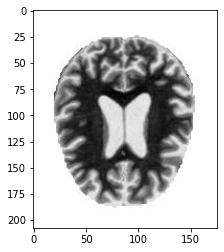

In [12]:
plt.imshow(plt.imread(test_MildDemented), cmap=plt.cm.binary)
plt.show()

In [13]:
import os
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
import numpy as np
import tensorflow as tf
from keras.models import load_model


Using TensorFlow backend.


(1279, 150, 150, 1)
(1279, 4)
[1. 0. 0. 0.]


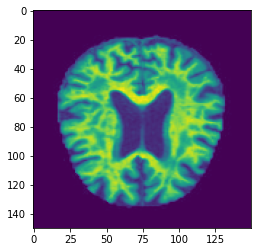

In [14]:
test=np.load("Alzheimer_data_150_test_22-05_1279.npy")
print(test.shape)  
test_label=np.load("Alzheimer_label_150_test_22-05_1279.npy")
print(test_label.shape)  
plt.imshow(test[178])
print(test_label[178])

In [15]:
labels=np. array(class_names)
labels
for i in labels:
    print(i)

MildDemented
ModerateDemented
NonDemented
VeryMildDemented


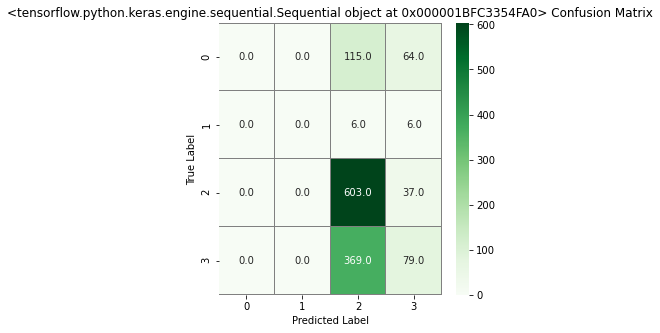

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset

Y_pred = model.predict(test)

# Convert predictions classes to one hot vectors

Y_pred_classes = np.argmax(Y_pred,axis = 1)

# Convert validation observations to one hot vectors

Y_true = np.argmax(test_label,axis = 1) 

# compute the confusion matrix

confusion_mtx = confusion_matrix( Y_true, Y_pred_classes) 


# plot the confusion matrix
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("{} Confusion Matrix".format(model))
plt.show()